In [1]:
#Install any necessary libraries
# !pip freeze
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install sklearn
# !pip3 install matplotlib

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

# Cleveland Dataset

Attribute Information:

Only 14 attributes used:
1. #3 (age)
2. #4 (sex)
3. #9 (cp)
4. #10 (trestbps)
5. #12 (chol)
6. #16 (fbs)
7. #19 (restecg)
8. #32 (thalach)
9. #38 (exang)
10. #40 (oldpeak)
11. #41 (slope)
12. #44 (ca)
13. #51 (thal)
14. #58 (num) (the predicted attribute) 

In [3]:
attributes = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

df = pd.read_csv('cleaned_processed.cleveland.data', names=attributes)

X = df[cols]
Y = df.num

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size=0.2)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=0.3)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X, Y, test_size=0.4)

# 3. Neural Networks

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1300) reached and the optimization hasn't converged yet.
  warnings.warn(


Split 0.1
node: 15
0.8426966292134831
0.8
Split 0.2
node: 5
0.8270042194092827
0.9
Split 0.3
node: 13
0.8067632850241546
0.9111111111111111
Split 0.4
node: 10
0.8370786516853933
0.865546218487395
best split Nodes
1


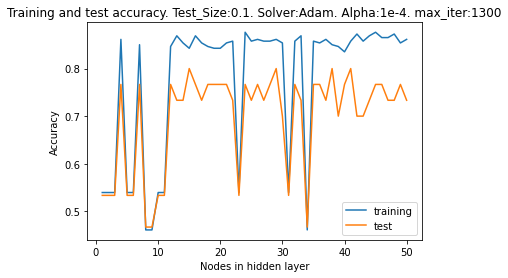

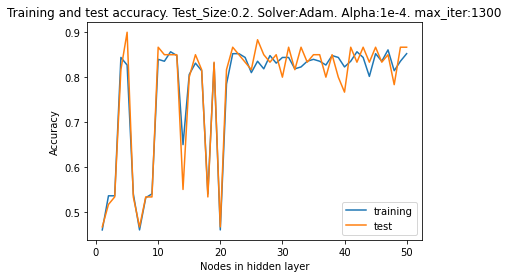

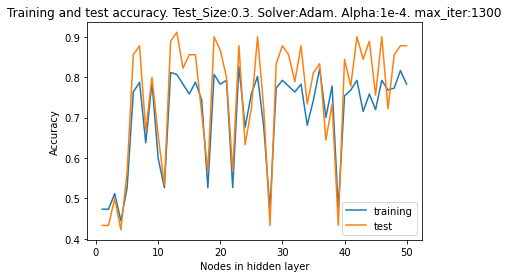

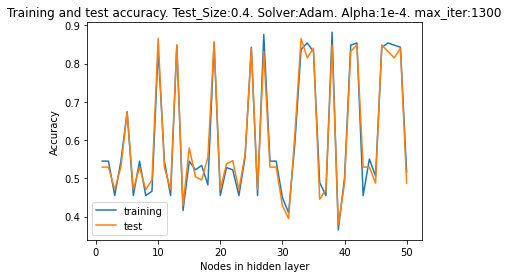

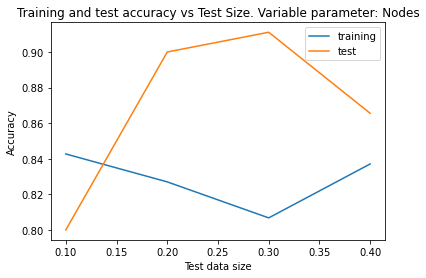

In [6]:
test_split = [0.1,0.2,0.3,0.4]
nodes = np.arange(1,51)

train1,test1,node1 = [],[],[]
train2,test2,node2 = [],[],[]
train3,test3,node3 = [],[],[]
train4,test4,node4 = [],[],[]
for size in test_split:
    xtrain,xtest,ytrain,ytest = None,None,None,None
    for node in nodes:
        if size == 0.1:
            xtrain,xtest,ytrain,ytest = X_train1, X_test1, Y_train1, Y_test1
        elif size == 0.2:
            xtrain,xtest,ytrain,ytest = X_train2, X_test2, Y_train2, Y_test2
        elif size == 0.3:
            xtrain,xtest,ytrain,ytest = X_train3, X_test3, Y_train3, Y_test3
        else:
            xtrain,xtest,ytrain,ytest = X_train4, X_test4, Y_train4, Y_test4
            
        nn = MLPClassifier(hidden_layer_sizes=(node), max_iter=1300, alpha=1e-4)
        nn.fit(xtrain,ytrain)
        
        if size == 0.1:
            train1.append(nn.score(xtrain,ytrain))
            test1.append(nn.score(xtest,ytest))
            node1.append(node)
        elif size == 0.2:
            train2.append(nn.score(xtrain,ytrain))
            test2.append(nn.score(xtest,ytest))
            node2.append(node)
        elif size == 0.3:
            train3.append(nn.score(xtrain,ytrain))
            test3.append(nn.score(xtest,ytest))
            node3.append(node)
        else:
            train4.append(nn.score(xtrain,ytrain))
            test4.append(nn.score(xtest,ytest))
            node4.append(node)

i1 = test1.index(max(test1))
print("Split 0.1")
print("node:",node1[i1])
print(train1[i1])
print(test1[i1])
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Nodes in hidden layer")
ax1.set_ylabel("Accuracy")
ax1.set_title("Training and test accuracy. Test_Size:0.1. Solver:Adam. Alpha:1e-4. max_iter:1300")
ax1.plot(nodes, train1, label="training")
ax1.plot(nodes, test1, label="test")
ax1.legend()

i2 = test2.index(max(test2))
print("Split 0.2")
print("node:",node2[i2])
print(train2[i2])
print(test2[i2])
fig2, ax2 = plt.subplots()
ax2.set_xlabel("Nodes in hidden layer")
ax2.set_ylabel("Accuracy")
ax2.set_title("Training and test accuracy. Test_Size:0.2. Solver:Adam. Alpha:1e-4. max_iter:1300")
ax2.plot(nodes, train2, label="training")
ax2.plot(nodes, test2, label="test")
ax2.legend()  

i3 = test3.index(max(test3))
print("Split 0.3")
print("node:",node3[i3])
print(train3[i3])
print(test3[i3])
fig3, ax3 = plt.subplots()
ax3.set_xlabel("Nodes in hidden layer")
ax3.set_ylabel("Accuracy")
ax3.set_title("Training and test accuracy. Test_Size:0.3. Solver:Adam. Alpha:1e-4. max_iter:1300")
ax3.plot(nodes, train3, label="training")
ax3.plot(nodes, test3, label="test")
ax3.legend()

i4 = test4.index(max(test4))
print("Split 0.4")
print("node:",node4[i4])
print(train4[i4])
print(test4[i4])
fig4, ax4 = plt.subplots()
ax4.set_xlabel("Nodes in hidden layer")
ax4.set_ylabel("Accuracy")
ax4.set_title("Training and test accuracy. Test_Size:0.4. Solver:Adam. Alpha:1e-4. max_iter:1300")
ax4.plot(nodes, train4, label="training")
ax4.plot(nodes, test4, label="test")
ax4.legend()

test_size = [0.4, 0.3, 0.2, 0.1]
training_max_nodes = [train4[i4],train3[i3],train2[i2],train1[i1]]
test_max_nodes = [test4[i4],test3[i3],test2[i2],test1[i1]]

figmaxm1, axmax1 = plt.subplots()
axmax1.set_xlabel("Test data size")
axmax1.set_ylabel("Accuracy")
axmax1.set_title("Training and test accuracy vs Test Size. Variable parameter: Nodes")
axmax1.plot(test_size, training_max_nodes, label="training")
axmax1.plot(test_size, test_max_nodes, label="test")
axmax1.legend()
print("best split Nodes")
print(test_max_nodes.index(max(test_max_nodes)))


Split 0.1
alpha: 1e-05
0.8426966292134831
0.8
Split 0.2
alpha: 1e-05
0.8185654008438819
0.8833333333333333
Split 0.3
alpha: 0.0001
0.8164251207729468
0.9
Split 0.4
alpha: 0.0001
0.5168539325842697
0.48739495798319327
best split alpha
1


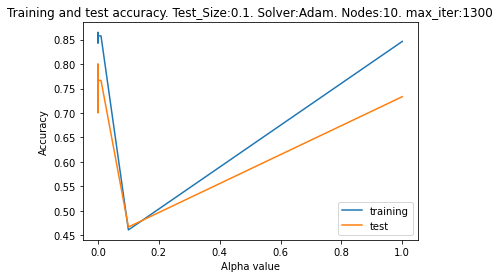

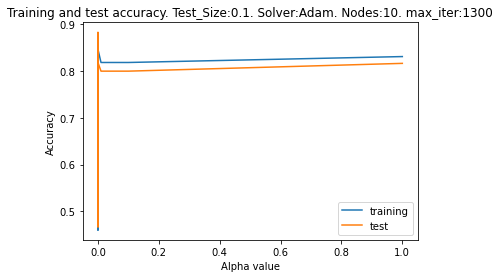

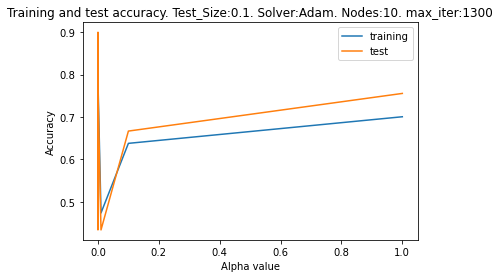

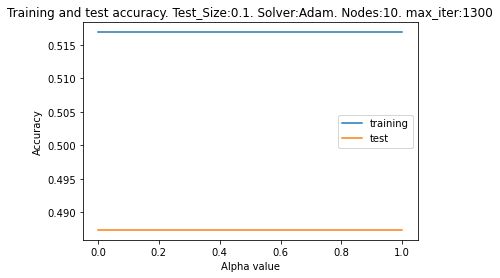

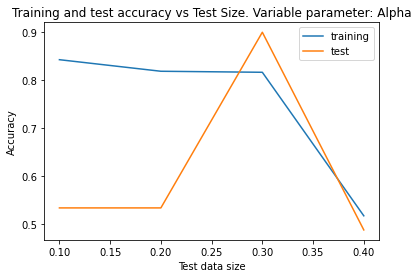

In [8]:
test_split = [0.1,0.2,0.3,0.4]
alphas= [1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

train11,test11,alpha1 = [],[],[]
train22,test22,alpha2 = [],[],[]
train33,test33,alpha3 = [],[],[]
train44,test44,alpha4 = [],[],[]
for size in test_split:
    xtrain1,xtest1,ytrain1,ytest1 = None,None,None,None
    for alpha in alphas:
        if size == 0.1:
            xtrain1,xtest1,ytrain1,ytest1 = X_train1, X_test1, Y_train1, Y_test1
        elif size == 0.2:
            xtrain1,xtest1,ytrain1,ytest1 = X_train2, X_test2, Y_train2, Y_test2
        elif size == 0.3:
            xtrain1,xtest1,ytrain1,ytest1 = X_train3, X_test3, Y_train3, Y_test3
        else:
            xtrain1,xtest1,ytrain1,ytest1 = X_train4, X_test4, Y_train4, Y_test4
            
        nn1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1300, alpha=alpha)
        nn1.fit(xtrain1,ytrain1)
        
        if size == 0.1:
            train11.append(nn1.score(xtrain1,ytrain1))
            test11.append(nn1.score(xtest1,ytest1))
            alpha1.append(alpha)
        elif size == 0.2:
            train22.append(nn1.score(xtrain1,ytrain1))
            test22.append(nn1.score(xtest1,ytest1))
            alpha2.append(alpha)
        elif size == 0.3:
            train33.append(nn1.score(xtrain1,ytrain1))
            test33.append(nn1.score(xtest1,ytest1))
            alpha3.append(alpha)
        else:
            train44.append(nn.score(xtrain1,ytrain1))
            test44.append(nn.score(xtest1,ytest1))
            alpha4.append(alpha)

j1 = test11.index(max(test11))
print("Split 0.1")
print("alpha:",alpha1[j1])
print(train11[j1])
print(test11[j1])
fig11, ax11 = plt.subplots()
ax11.set_xlabel("Alpha value")
ax11.set_ylabel("Accuracy")
ax11.set_title("Training and test accuracy. Test_Size:0.1. Solver:Adam. Nodes:10. max_iter:1300")
ax11.plot(alphas, train11, label="training")
ax11.plot(alphas, test11, label="test")
ax11.legend()

j2 = test22.index(max(test22))
print("Split 0.2")
print("alpha:",alpha2[j2])
print(train22[j2])
print(test22[j2])
fig22, ax22 = plt.subplots()
ax22.set_xlabel("Alpha value")
ax22.set_ylabel("Accuracy")
ax22.set_title("Training and test accuracy. Test_Size:0.2. Solver:Adam. Nodes:10. max_iter:1300")
ax22.plot(alphas, train22, label="training")
ax22.plot(alphas, test22, label="test")
ax22.legend()  

j3 = test33.index(max(test33))
print("Split 0.3")
print("alpha:",alpha3[j3])
print(train33[j3])
print(test33[j3])
fig33, ax33 = plt.subplots()
ax33.set_xlabel("Alpha value")
ax33.set_ylabel("Accuracy")
ax33.set_title("Training and test accuracy. Test_Size:0.3. Solver:Adam. Nodes:10. max_iter:1300")
ax33.plot(alphas, train33, label="training")
ax33.plot(alphas, test33, label="test")
ax33.legend()

j4 = test44.index(max(test44))
print("Split 0.4")
print("alpha:",alpha4[j3])
print(train44[j4])
print(test44[j4])
fig44, ax44 = plt.subplots()
ax44.set_xlabel("Alpha value")
ax44.set_ylabel("Accuracy")
ax44.set_title("Training and test accuracy. Test_Size:0.4. Solver:Adam. Nodes:10. max_iter:1300")
ax44.plot(alphas, train44, label="training")
ax44.plot(alphas, test44, label="test")
ax44.legend()

test_size = [0.4, 0.3, 0.2, 0.1]
training_max_alpha = [train44[j4],train33[j3],train22[j2],train11[j1]]
test_max_alpha = [test44[j4],test33[j3],test2[j2],test1[j1]]

figmaxm2, axmax2 = plt.subplots()
axmax2.set_xlabel("Test data size")
axmax2.set_ylabel("Accuracy")
axmax2.set_title("Training and test accuracy vs Test Size. Variable parameter: Alpha")
axmax2.plot(test_size, training_max_alpha, label="training")
axmax2.plot(test_size, test_max_alpha, label="test")
axmax2.legend()
print("best split alpha")
print(test_max_alpha.index(max(test_max_alpha)))